<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D-Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***선형 회귀분석 : Linear Regression***

-  y = 0.1x + 0.3 + e 함수식으로 임의의 데이터 (x, y)를 생성한 후 linear regression (OLS)으로 회귀직선을 찾고 추정오류를 측정한다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# 샘플 데이터 1,000개를 생성한다 # y = ax + b + e
def createData(a, b, n):
  resultX = []
  resultY = []
  for i in range(n):
    x = np.random.normal(0.0, 0.5)
    y = a * x + b + np.random.normal(0.0, 0.05)
    resultX.append(x)
    resultY.append(y)
  return np.array(resultX).reshape(-1,1), np.array(resultY).reshape(-1,1)

In [ ]:
# Train 데이터 세트와 Test 데이터 세트를 구성한다
X, Y = createData(0.1, 0.3, 1000) # y = 0.1x + 0.3 + e

In [ ]:
# Logistic Regression으로 Train 데이터 세트를 학습한다. 
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [ ]:
# 결과를 확인한다
a = model.coef_[0][0]
b = model.intercept_[0]
print("\n* 회귀직선의 방정식 (OLS) : y = %.4f * x + %.4f" % (a, b)) 
yHat = model.predict(X)


* 회귀직선의 방정식 (OLS) : y = 0.1029 * x + 0.2995


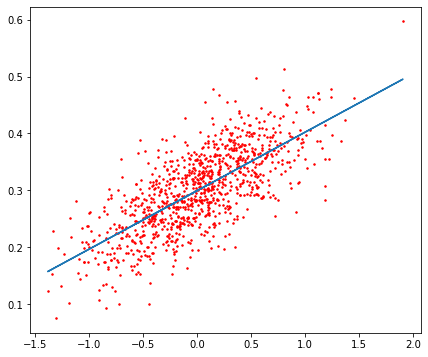

In [ ]:
fig = plt.figure(figsize=(7, 6)) 
plt.plot(X, Y, 'ro', markersize=1.5) 
plt.plot(X, yHat)
plt.show()

In [ ]:
# 시험 데이터 전체의 오류를 R-square로 표시한다.
print('\n시험 데이터 전체 오류 (R2-score) = %.4f' % model.score(X, Y))


시험 데이터 전체 오류 (R2-score) = 0.5232


In [ ]:
# R-square를 manual로 계산하고, model.score() 결과와 비교한다. # SSE : explained sum of square
# SSR : residual sum of square (not explained)
# SST : total sum of square
# R-square : SSE / SST or 1 - (SSR / SST)
ssr = np.sum(np.square(yHat - Y)) 
sst = np.sum(np.square(Y - Y.mean())) 
R2 = 1 - ssr / sst
print('R-square = %.4f' % R2)

R-square = 0.5232
